# Python for Data Science

## Outline
## Why Python?
## Tutorial
- ### Data Problem
- ### Pandas - loading data, selecting and filtering 
- ### Data cleaning
- ### Reshaping data using pandas

## Questions


## Why Python? 
- Great language for beginners - open source, great community
- Large ecosystem for writing web applications, deploying code in production
- Data analytics and scientific computing - numpy, scipy, pandas, matplotlib
- Advanced machine learning tools - sklearn, theano, tensorflow (keras)

## Data Problem

**Modeling Problem** - Can we predict a movies Gross from other parameters such as rating, genre, budget etc.?  

**Dataset** - IMDB Movies Dataset

**What** - Preparing a dataset for linear regression analysis

## Pandas
Pandas is a data analytics toolkit providing data structures for analyzing tabular and time-series data. It is built over numpy.


### Loading Data

In [37]:
import pandas as pd
data = pd.read_csv("data/movies.csv", usecols=[
    "Title", 
    "Released", 
    "Runtime", 
    "Genre",
    "Budget",
    "Gross",
    "imdbVotes",
    "imdbRating",
    "Type"],
    parse_dates=["Released",],
)
data.head()

,Title,Released,Runtime,Genre,imdbRating,imdbVotes,Type,Budget,Gross
0,39 Pounds of Love,2005-04-08,70 min,"Documentary, Biography, Romance",6.8,234.0,movie,NaN,NaN
1,3:am,2005-01-25,21 min,"Short, Thriller",8.2,13.0,movie,NaN,NaN
2,500 Years Later,2005-02-24,106 min,Documentary,7.0,161.0,movie,NaN,NaN
3,5th World,2005-01-20,75 min,"Drama, Romance",6.4,31.0,movie,NaN,NaN
4,90,2005-03-12,14 min,"War, Short",8.3,18.0,movie,NaN,NaN


In [38]:
len(data)

40789

In [39]:
data.dtypes

Title                 object
Released      datetime64[ns]
Runtime               object
Genre                 object
imdbRating           float64
imdbVotes            float64
Type                  object
Budget               float64
Gross                float64
dtype: object

In [40]:
# Selecting a column
data["Title"].head()

0    39 Pounds of Love
1                 3:am
2      500 Years Later
3            5th World
4                   90
Name: Title, dtype: object

In [41]:
# selecting data using ix
data.ix[:5, ["Title", "Runtime"]]

,Title,Runtime
0,39 Pounds of Love,70 min
1,3:am,21 min
2,500 Years Later,106 min
3,5th World,75 min
4,90,14 min
5,Abel Raises Cain,82 min


In [42]:
data.iloc[:5, [0, 2]]

,Title,Runtime
0,39 Pounds of Love,70 min
1,3:am,21 min
2,500 Years Later,106 min
3,5th World,75 min
4,90,14 min


In [43]:
# logical indexing
data.ix[[True, False, True, False, False, True]]

,Title,Released,Runtime,Genre,imdbRating,imdbVotes,Type,Budget,Gross
0,39 Pounds of Love,2005-04-08,70 min,"Documentary, Biography, Romance",6.8,234.0,movie,NaN,NaN
2,500 Years Later,2005-02-24,106 min,Documentary,7.0,161.0,movie,NaN,NaN
5,Abel Raises Cain,2005-01-23,82 min,"Documentary, Biography",7.5,197.0,movie,NaN,NaN


In [44]:
# types of objects in the dataset
data["Type"].unique()

array(['movie', 'series', 'game'], dtype=object)

In [45]:
# lets filter out the movies only
movies = data[data["Type"] == "movie"]
len(movies)

40000

In [47]:
# gross is our predicted variables, remove NA values for Gross
movies_for_model = movies[movies["Gross"].notnull()]

# select movies with Released Date > 2000
movies_for_model = movies_for_model[movies_for_model["Released"].notnull()]
movies_2000 = movies_for_model[movies_for_model["Released"].dt.year >= 2000]
len(movies_for_model)
len(movies_2000)

3325

## Data Cleaning
### Converting columns to proper data types for analysis
- Runtime
- Release Date

In [48]:
# Runtime
runtime = movies_2000["Runtime"]
runtime = runtime.str.extract("(\d+) min", expand=False)
runtime = pd.to_numeric(runtime)

movies_2000.loc[:, "Runtime_numeric"] = runtime
movies_2000.head()

,Title,Released,Runtime,Genre,imdbRating,imdbVotes,Type,Budget,Gross,Runtime_numeric
12,Alone in the Dark,2005-01-28,96 min,"Horror, Sci-Fi",2.3,37613.0,movie,20000000.0,8178569.0,96.0
20,Are We There Yet?,2005-01-21,95 min,"Adventure, Comedy, Family",4.6,22611.0,movie,20000000.0,98114471.0,95.0
26,Be Cool,2005-03-04,118 min,"Comedy, Crime, Music",5.7,59443.0,movie,75000000.0,94944017.0,118.0
27,Beauty Shop,2005-03-30,105 min,Comedy,5.5,13197.0,movie,25000000.0,38351350.0,105.0
28,Because of Winn-Dixie,2005-02-18,106 min,"Comedy, Drama, Family",6.4,8427.0,movie,15000000.0,33508485.0,106.0


In [ ]:
movies_2000.dtypes

In [49]:
movies_2000.loc[:, "Released_Year"] = movies_2000["Released"].dt.year
movies_2000.loc[:, "Released_Month"] = movies_2000["Released"].dt.month

movies_1 = movies_2000.drop(["Released", "Type", "Runtime"], axis=1)
movies_1.head()

,Title,Genre,imdbRating,imdbVotes,Budget,Gross,Runtime_numeric,Released_Year,Released_Month
12,Alone in the Dark,"Horror, Sci-Fi",2.3,37613.0,20000000.0,8178569.0,96.0,2005,1
20,Are We There Yet?,"Adventure, Comedy, Family",4.6,22611.0,20000000.0,98114471.0,95.0,2005,1
26,Be Cool,"Comedy, Crime, Music",5.7,59443.0,75000000.0,94944017.0,118.0,2005,3
27,Beauty Shop,Comedy,5.5,13197.0,25000000.0,38351350.0,105.0,2005,3
28,Because of Winn-Dixie,"Comedy, Drama, Family",6.4,8427.0,15000000.0,33508485.0,106.0,2005,2


### Dealing with missing values
- remove missing values
- imputation
    - replace missing values by mean or median
    - replace missing values using an approximation from similar data or a probabilistic model of data
    - represent missing values with an additional column

In [50]:
# number of missing values per column
print "Length of the movies_1 dataset: %s\n" % len(movies_1)

print "Missing values in columns: "
for col in movies_1:
    print col.ljust(20), str(movies_1[col].isnull().sum()).ljust(20)

Length of the movies_1 dataset: 3325

Missing values in columns: 
Title                0                   
Genre                3                   
imdbRating           26                  
imdbVotes            26                  
Budget               0                   
Gross                0                   
Runtime_numeric      24                  
Released_Year        0                   
Released_Month       0                   


In [51]:
# we will use median for rest of the variables
movies_2 = movies_1
for col in ["imdbRating", "imdbVotes", "Budget", "Runtime_numeric"]:
    median = movies_2[col].median()
    movies_2[col].fillna(median)

movies_2.head()

,Title,Genre,imdbRating,imdbVotes,Budget,Gross,Runtime_numeric,Released_Year,Released_Month
12,Alone in the Dark,"Horror, Sci-Fi",2.3,37613.0,20000000.0,8178569.0,96.0,2005,1
20,Are We There Yet?,"Adventure, Comedy, Family",4.6,22611.0,20000000.0,98114471.0,95.0,2005,1
26,Be Cool,"Comedy, Crime, Music",5.7,59443.0,75000000.0,94944017.0,118.0,2005,3
27,Beauty Shop,Comedy,5.5,13197.0,25000000.0,38351350.0,105.0,2005,3
28,Because of Winn-Dixie,"Comedy, Drama, Family",6.4,8427.0,15000000.0,33508485.0,106.0,2005,2


#### How to deal with missing values during testing or prediction

In [52]:
import numpy as np
from sklearn.preprocessing import Imputer
fit_data = movies_2[["imdbRating", "imdbVotes", "Budget", "Runtime_numeric"]]
imp = Imputer(missing_values=np.nan, strategy="median", axis=0)
imp = imp.fit(fit_data)
imp.transform([[2, 3, np.nan, np.nan], [1, np.nan, 4, 3]])

array([[  2.00000000e+00,   3.00000000e+00,   2.00000000e+07,
          1.02000000e+02],
       [  1.00000000e+00,   3.62680000e+04,   4.00000000e+00,
          3.00000000e+00]])

### Dealing with outliers

<IPython.core.display.Javascript object>


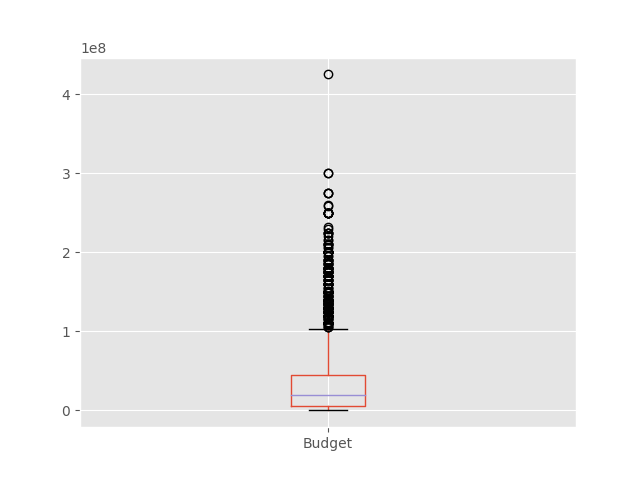

In [53]:
%matplotlib notebook
import matplotlib
matplotlib.style.use('ggplot')

movies_2.boxplot("Budget")

- Outliers can be detected via finding observations which are +/- a few standard deviations away from mean. This method is a little problematic because the calculations are not robust
- Robust statistics - remove/clip data from either end using ranking (or percentiles)

<IPython.core.display.Javascript object>


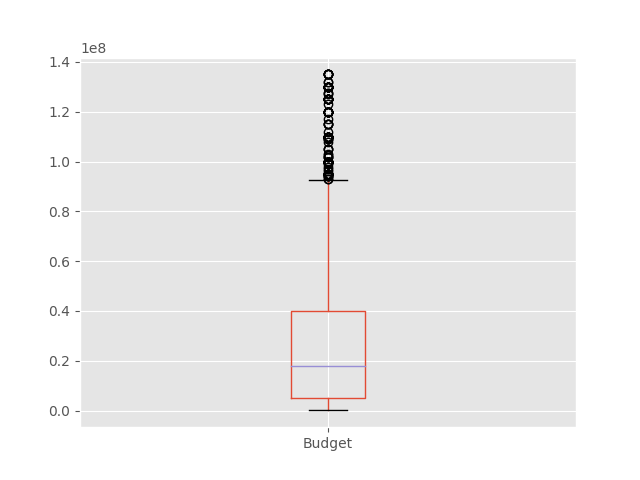

In [54]:
%matplotlib notebook
high = movies_2["Budget"].quantile(0.95)
low = movies_2["Budget"].quantile(0.01)

movies_2 = movies_2[(movies_2["Budget"] <= high) & (movies_2["Budget"] >= low)]
movies_2.boxplot("Budget")

### How to use categorical data (k-hot encoding)
- We will use the genres column to demonstrate one-hot encoding but the technique is general

In [56]:
genres = movies_2["Genre"].str.get_dummies(", ")
genres_list = list(genres)
movies_3 = pd.concat([movies_2, genres], axis=1)
movies_3 = movies_3.drop("Genre", axis=1)
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Voila! We have a dataset ready for analysis
- Last step, we will partition the data set into test and training size

In [ ]:
import numpy as np
training_set_size = 0.6

mask = np.random.rand(len(movies_3)) <= 0.6
training_set = movies_3[mask]
test_set = movies_3[~mask]

len(movies_3), len(training_set), len(test_set)

### Special Treat: Split/Apply/Combine data using pandas

In [57]:
movies.loc[:, "Released_Year"] = pd.to_numeric(movies["Released"].dt.year)

genres = movies["Genre"].str.get_dummies(", ")
movies_x = pd.concat([movies, genres], axis=1)

genres_list = list(genres)
g = movies_x.groupby("Released_Year")
genres_vs_year = g[genres_list].sum()
genres_vs_year.tail()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Released_Year,,,,,,,,,,,,,,,,,,,,,
2014.0,82,0,51,19,31,99,45,41,182,16,...,3,0,38,35,42,9,1,75,4,4
2015.0,66,0,40,13,20,94,40,27,173,16,...,0,1,35,29,39,7,0,81,3,2
2016.0,43,0,30,12,10,42,15,11,70,11,...,1,0,17,13,22,3,0,25,0,2
2017.0,1,0,1,0,0,1,0,0,2,0,...,0,0,1,1,0,0,0,0,0,0
2018.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>


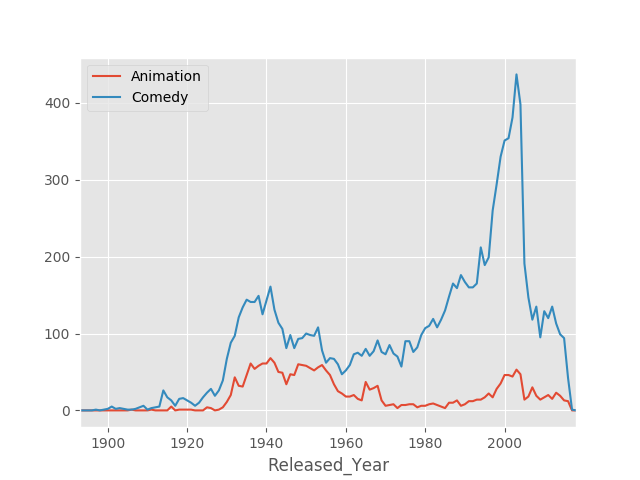

In [58]:
genres_vs_year[["Animation", "Comedy"]].plot()

## Melting & Pivoting

In [59]:
runtime = movies_x["Runtime"].copy()
runtime = runtime.str.extract("(\d+) min", expand=False)
runtime = pd.to_numeric(runtime)
movies_x.loc[:, "Runtime_numeric"] = runtime
movies_subset = movies_x[["Title", "Released_Year", "Runtime_numeric", "Animation", "Comedy"]]
movies_subset.head()

,Title,Released_Year,Runtime_numeric,Animation,Comedy
0,39 Pounds of Love,2005.0,70.0,0,0
1,3:am,2005.0,21.0,0,0
2,500 Years Later,2005.0,106.0,0,0
3,5th World,2005.0,75.0,0,0
4,90,2005.0,14.0,0,0


In [60]:
movies_melted = pd.melt(movies_subset, id_vars=["Title", "Released_Year", "Runtime_numeric"], 
        value_vars=["Animation", "Comedy"], 
        var_name="Genre",
       value_name="Value")
movies_melted.head()

,Title,Released_Year,Runtime_numeric,Genre,Value
0,39 Pounds of Love,2005.0,70.0,Animation,0
1,3:am,2005.0,21.0,Animation,0
2,500 Years Later,2005.0,106.0,Animation,0
3,5th World,2005.0,75.0,Animation,0
4,90,2005.0,14.0,Animation,0


In [61]:
movies_melted = movies_melted[movies_melted["Value"]==1]
movies_melted.head()

,Title,Released_Year,Runtime_numeric,Genre,Value
80,Felix - Ein Hase auf Weltreise,2014.0,81.0,Animation,1
175,Pooh's Heffalump Movie,2005.0,68.0,Animation,1
184,Robots,2005.0,91.0,Animation,1
228,Valiant,2005.0,76.0,Animation,1
338,Baby Eat Baby,2004.0,12.0,Animation,1


In [62]:
runtime_vs_year = movies_melted.groupby(["Released_Year", "Genre"], as_index=False)
runtime_vs_year = runtime_vs_year["Runtime_numeric"].mean()
runtime_vs_year.head()

,Released_Year,Genre,Runtime_numeric
0,1897.0,Comedy,1.0
1,1899.0,Comedy,1.0
2,1900.0,Comedy,1.5
3,1901.0,Comedy,1.2
4,1902.0,Comedy,1.5


In [63]:
runtime_vs_year_pivoted = runtime_vs_year.pivot(index="Released_Year", columns="Genre", values="Runtime_numeric")
runtime_vs_year_pivoted.head()

Genre,Animation,Comedy
Released_Year,,
1897.0,NaN,1.0
1899.0,NaN,1.0
1900.0,NaN,1.5
1901.0,NaN,1.2
1902.0,NaN,1.5


<IPython.core.display.Javascript object>


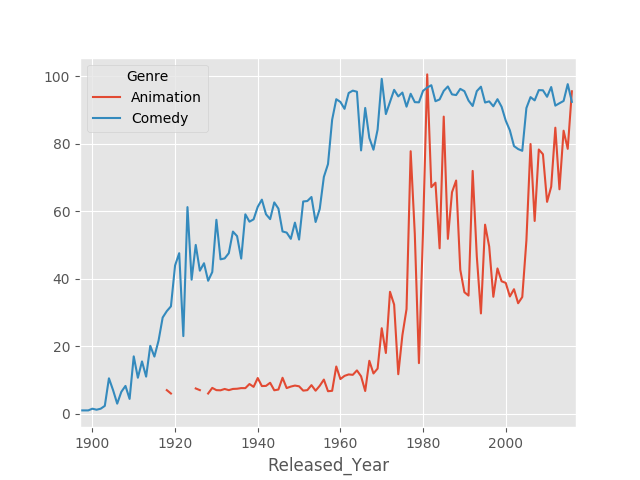

In [64]:
runtime_vs_year_pivoted.plot()

# Thanks!